# 3. 도형 그리기

어디에 쓰일까?  
윈도우에 도형을 그리는 작업을 할 것이다 -> 이미지나 동영상에서 어떤 특정 위치를 표시하고 싶을 때 쓸 수 있다.   
예를 들면 얼굴 인식을 했을 때 얼굴 부분에 사각형을 그릴 수도 있고, 눈이 있다면 눈 근처에 동그라미가 있을 수도 있다.   


## 빈 스케치북 만들기

In [24]:
import cv2
import numpy as np #numpy를 np라고 부른다. 함수를 쓸 때 np.~~하면 됨

#이게 스케치북 만든거임
#세로 480 x 가로 640, 3Channel (RGB)에 해당하는 스케치북 만들기
img = np.zeros((480,640,3), dtype=np.uint8) #zeros -> 0으로 공간을 채우라는 말

#전체 공간을 흰색으로 채우고 싶다면? -> 전부 255면 흰색이니까
#img[:] = (255,255,255) #!!!!!!!!!!!openCV에서는 RGBX ----->>>> BGR이다!!!!!

cv2.imshow('img', img)
cv2.waitKey(0) #무한대기
cv2.destroyAllWindows()

## 일부 영역 색칠해보기

특정 위치 특정 영역을 색칠해보기  

In [51]:
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype=np.uint8) #스케치북 만들기!!

#영역 정해주기
#[ 세로를 기준으로 100px에서(:)200px까지, 가로를 기준으로 300px에서(:)400px까지] -> 255,255,255(흰색)으로 채워라!
img[100:200, 200:300] =(255,255,255) 
#세로 영역 기준, 가로 영역 기준 -> 원하는 색 채우기

cv2.imshow('img', img)
cv2.waitKey(0) #무한대기
cv2.destroyAllWindows()


>>보충사진   
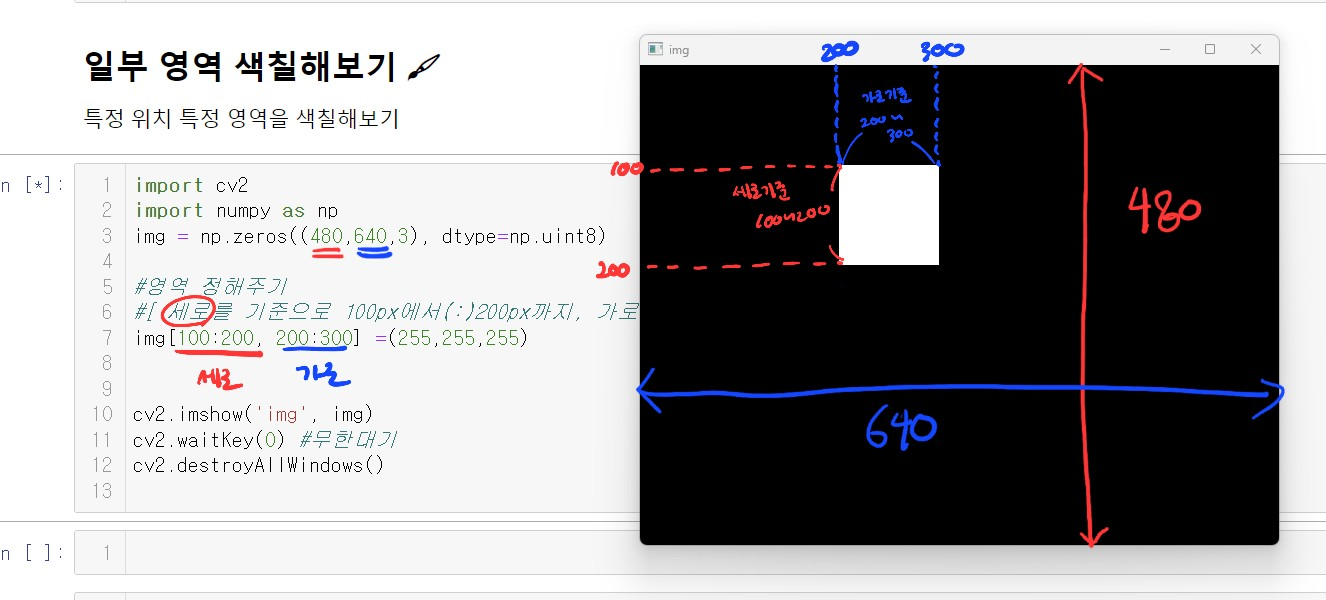

## 직선 그어보기

직선의 종류 -> Line Type

1. cv2.LINE_4 : 상하좌우 4방향으로 연결된 선
2. cv2.LINE_8 : 대각선을 포함한 8방향으로 연결된 선(디폴트)
3. cv2.LINE_AA : 부드러운 선(anti-aliasing)

>추가자료(LINE_4와 LINE_8의 차이)
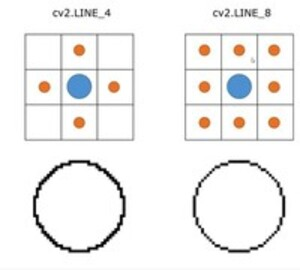


In [59]:
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype=np.uint8) #스케치북 만들기

COLOR = (0,255,255) #선의 색깔  BGR순서, 노란색 
THICKNESS = 3 #선의 두께

# 시작점->(x축, y축), 끝점->(x축, y축)
#(그릴 위치, 시작점, 끝점, 색깔, 두께, 선 중류)
cv2.line(img, (50,100), (400,50), COLOR, THICKNESS, cv2.LINE_8)
cv2.line(img, (50,200), (400,150), COLOR, THICKNESS, cv2.LINE_4)
cv2.line(img, (50,300), (400,250), (255,255,255) , THICKNESS, cv2.LINE_AA) #더 부드럽게 보임

cv2.imshow('img', img)
cv2.waitKey(0)#무한대기
cv2.destroyAllWindows()



## 원

In [58]:
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype=np.uint8) #스케치북 만들기

COLOR = (255,255,0) #색깔 , 민트색?
RADIUS = 50#원의 크기
THICKNESS = 10 #두께

#속이 빈 원 그리기
cv2.circle(img, (200,100), RADIUS, COLOR, THICKNESS, cv2.LINE_AA) 
#(그릴 위치(img) , 원의 중심점, 반지름, 색깔, 두께, 어떤 선의 타입으로 그릴지 )

#색칠 되어있는 원 그리기
cv2.circle(img, (400,100), RADIUS, COLOR, cv2.FILLED, cv2.LINE_AA) 

cv2.imshow('img', img)
cv2.waitKey(0)#무한대기
cv2.destroyAllWindows()


## 사각형

In [57]:
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype=np.uint8)

COLOR = (0,255,0) #색깔, 초록색
THICKNESS = 3 #두께

#속이 빈 사각형
cv2.rectangle(img, (100,100), (200,200), COLOR, THICKNESS)
#(img, 왼쪽 위 좌표, 오른쪽 아래 , 색깔, 두께)

#속이 찬 사각형
cv2.rectangle(img, (300,100), (400,300), COLOR, cv2.FILLED)

cv2.imshow('img', img)
cv2.waitKey(0)#무한대기
cv2.destroyAllWindows()


## 다각형

다각형은 좌표를 각각 지정해줘야한다!

In [9]:
import cv2
import numpy as np
img = np.zeros((480,640,3), dtype=np.uint8)

COLOR = (0,0,255) #색깔, 빨간색
THICKNESS = 3 #두께


pts1 = np.array([[100, 100], [200, 100], [100, 200]]) #점 세 개를 이으면 삼각형
pts2 = np.array([[100, 250], [200, 250], [100, 350]]) #true,false구분을 위해 넣음
pts3 = np.array([[200, 100], [300, 100], [300, 200]]) 
"""
#다각형 출력부분
cv2.polylines(img, [pts1], True, COLOR, THICKNESS, cv2.LINE_AA) #True -> 닫힘영역
cv2.polylines(img, [pts2], False, COLOR, THICKNESS, cv2.LINE_AA) # False -> 열린 영역
cv2.polylines(img, [pts3], True, COLOR, THICKNESS, cv2.LINE_AA) #True -> 닫힘영역
"""
cv2.polylines(img, [pts1,pts2,pts3], True, COLOR, THICKNESS, cv2.LINE_AA) #위 주석문을 한 줄로->2번째에 list형태로 넣어주기
#(img, 그릴 좌표들, 닫힘여부, 색깔,두께,선 종류)


cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np

img = np.zeros((480,640,3), dtype=np.uint8)

COLOR = (0,0,255) #색깔, 빨간색
THICKNESS = 3 #두께

#빈 삼각형 두 개를 이은 영역
pts1 = np.array([[100, 100], [200, 100], [100, 200]])
pts2 = np.array([[200, 100], [300, 100], [300, 200]]) 
cv2.polylines(img, [pts1,pts2], True, COLOR, THICKNESS, cv2.LINE_AA)

#차있는 삼각형 두 개를 이은 영역, >>>pts1,pts2 2줄을 한 줄 코드로 작성<<<
pts3 = np.array([[ [100,300],[200,300],[100,400] ],[ [200,300],[300,300],[300,400] ]])
cv2.fillPoly(img, pts3, COLOR,  cv2.LINE_AA) 
# 위에서 이미 array형태로 만들어줘서 여기에서는 [pts1]이라고 할 필요가 없다.
#어차피 꽉 차있기 때문에 True,False나 두께가 상관없다.

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

>👆위의 코드의 이해를 위한 이미지... 
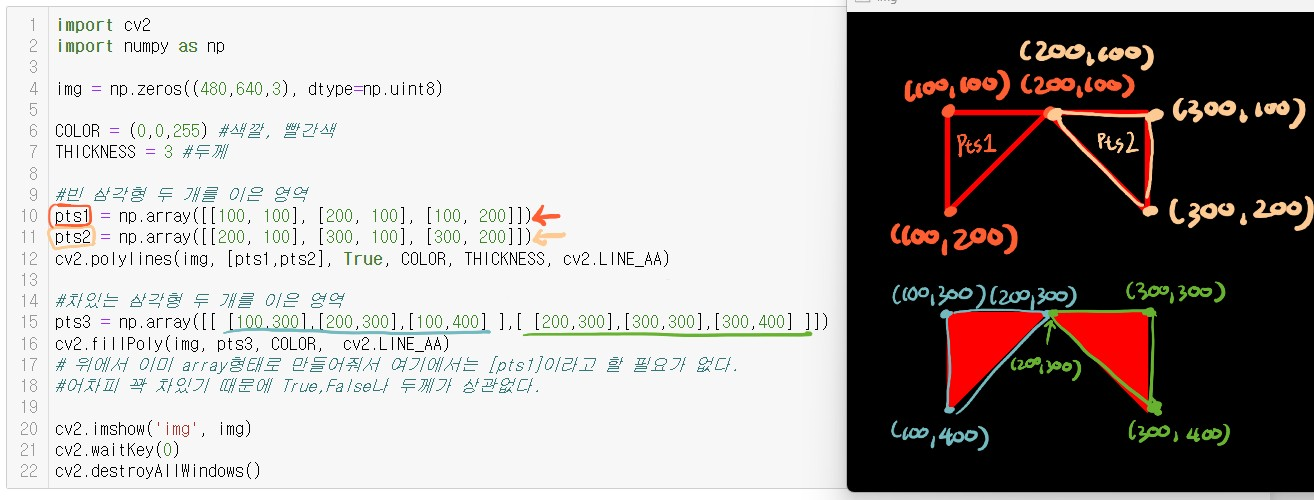